In [5]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import time

# Data Collection (Web Scrapping)

Data collected from Lamudi.com

In [11]:
base_url = 'https://www.lamudi.co.id/east-kalimantan/balikpapan/house/buy/'
page = 1

In [12]:
daerah = []
kamar_tidur = []
luas_bangunan = []
luas_lahan = []
harga = []

In [13]:
print('Starting the web scrapping. . .')
try:
    time.sleep(5)
    while True:
        if page == 1:
            url = f'{base_url}'
        else:
            url = f'{base_url}?page={page}'

        print(f'Currently in page {page}')

        if page == 16:
            raise AttributeError

        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
            'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
            'Accept-Language': 'en-US,en;q=0.9',
            'Accept-Encoding': 'gzip, deflate, br',
            'Connection': 'keep-alive',
            'Upgrade-Insecure-Requests': '1',
            'Cache-Control': 'max-age=0',
            'Referer': 'https://www.example.com',
        }

        response = requests.get(url, headers=headers)

        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')

            # Use find_all to get a list of all cards
            cards = soup.find_all('div', class_='ListingCell-AllInfo ListingUnit')

            for card in cards:
                tempat = card.find('span', class_='ListingCell-KeyInfo-address-text').text.strip()

                harga_rumah = card.find('span', class_='PriceSection-FirstPrice').text.strip()

                info = card.find_all('span', class_='KeyInformation-value_v2 KeyInformation-amenities-icon_v2')
                infos = [i.text.strip() for i in info]  # [jumlah_kamar, luas_bangunan, luas_lahan]

                if len(infos) == 3:
                    daerah.append(tempat)
                    kamar_tidur.append(int(infos[0]))
                    luas_bangunan.append(int(infos[1].strip().split()[0]))
                    luas_lahan.append(int(infos[2].strip().split()[0]))
                    harga.append(harga_rumah)

            # Add a delay to avoid overloading the server
            time.sleep(1)

        else:
            print(f"Failed to fetch data from page {page}. Status code: {response.status_code}")
            break  # Exit the loop if there's an issue with the request

        # Increment the page number
        page += 1

except AttributeError:
    print('There is no more necessary data in the page, proceed to exit. . .')

finally:
    print(f'Web scrapping from {base_url} is done. . .')

Starting the web scrapping. . .
Currently in page 1
Currently in page 2
Currently in page 3
Currently in page 4
Currently in page 5
Currently in page 6
Currently in page 7
Currently in page 8
Currently in page 9
Currently in page 10
Currently in page 11
Currently in page 12
Currently in page 13
Currently in page 14
Currently in page 15
Currently in page 16
There is no more necessary data in the page, proceed to exit. . .
Web scrapping from https://www.lamudi.co.id/east-kalimantan/balikpapan/house/buy/ is done. . .


In [14]:
data = {
    'daerah': daerah,
    'kamar_tidur': kamar_tidur,
    'luas_bangunan (m²)': luas_lahan,
    'luas_lahan (m²)': luas_bangunan,
    'harga': harga
}

df = pd.DataFrame(data)
df.head()

,daerah,kamar_tidur,luas_bangunan (m²),luas_lahan (m²),harga
0,"Sepinggan, Balikpapan",2,60,47,Rp960.690.000
1,"Sepinggan, Balikpapan",2,60,47,Rp960.690.000
2,"Karang Joang, Balikpapan",2,157,90,Rp726.000.000
3,Balikpapan,6,215,350,Rp1.500.000.000
4,"Balikpapan Selatan, Balikpapan",4,306,251,Rp2.300.000.000


In [15]:
df.shape

(449, 5)

# Data Cleaning

In [16]:
df0 = df.copy()
df0[['daerah1', 'daerah2']] = df['daerah'].str.split(', ', expand=True)
df0.head()

,daerah,kamar_tidur,luas_bangunan (m²),luas_lahan (m²),harga,daerah1,daerah2
0,"Sepinggan, Balikpapan",2,60,47,Rp960.690.000,Sepinggan,Balikpapan
1,"Sepinggan, Balikpapan",2,60,47,Rp960.690.000,Sepinggan,Balikpapan
2,"Karang Joang, Balikpapan",2,157,90,Rp726.000.000,Karang Joang,Balikpapan
3,Balikpapan,6,215,350,Rp1.500.000.000,Balikpapan,None
4,"Balikpapan Selatan, Balikpapan",4,306,251,Rp2.300.000.000,Balikpapan Selatan,Balikpapan


In [17]:
df0.rename(columns={
    'daerah1': 'kecamatan',
    'daerah2': 'kota'
}, inplace=True)
df0.head()

,daerah,kamar_tidur,luas_bangunan (m²),luas_lahan (m²),harga,kecamatan,kota
0,"Sepinggan, Balikpapan",2,60,47,Rp960.690.000,Sepinggan,Balikpapan
1,"Sepinggan, Balikpapan",2,60,47,Rp960.690.000,Sepinggan,Balikpapan
2,"Karang Joang, Balikpapan",2,157,90,Rp726.000.000,Karang Joang,Balikpapan
3,Balikpapan,6,215,350,Rp1.500.000.000,Balikpapan,None
4,"Balikpapan Selatan, Balikpapan",4,306,251,Rp2.300.000.000,Balikpapan Selatan,Balikpapan


In [18]:
df0['kecamatan'] = df0.kecamatan.apply(lambda x: 'lainnya' if x == 'Balikpapan' else x)
df0.kecamatan.value_counts()

kecamatan
Balikpapan Selatan    195
Balikpapan Utara       81
lainnya                62
Balikpapan Kota        33
Balikpapan Timur       23
Sepinggan              12
Manggar                 8
Gunung Bahagia          7
Karang Joang            6
Batu Ampar              5
Balikpapan Tengah       5
Damai                   3
Gunung Samarinda        3
Karang Jati             1
Muara Rapak             1
Mekar Sari              1
Gunung Sari Ilir        1
Telaga Sari             1
Balikpapan Barat        1
Name: count, dtype: int64

In [19]:
df1 = df0[df0['kecamatan'].isin(['Balikpapan Timur', 'Balikpapan Barat', 'Balikpapan Utara', 'Balikpapan Kota', 'Balikpapan Selatan', 'Balikpapan Tengah'])]
df1.head()

,daerah,kamar_tidur,luas_bangunan (m²),luas_lahan (m²),harga,kecamatan,kota
4,"Balikpapan Selatan, Balikpapan",4,306,251,Rp2.300.000.000,Balikpapan Selatan,Balikpapan
5,"Balikpapan Selatan, Balikpapan",4,120,136,Rp1.750.000.000,Balikpapan Selatan,Balikpapan
6,"Balikpapan Timur, Balikpapan",2,157,65,Rp650.000.000,Balikpapan Timur,Balikpapan
7,"Balikpapan Utara, Balikpapan",3,78,100,Rp900.000.000,Balikpapan Utara,Balikpapan
8,"Balikpapan Utara, Balikpapan",3,120,90,Rp760.000.000,Balikpapan Utara,Balikpapan


In [20]:
df1.kecamatan.value_counts()

kecamatan
Balikpapan Selatan    195
Balikpapan Utara       81
Balikpapan Kota        33
Balikpapan Timur       23
Balikpapan Tengah       5
Balikpapan Barat        1
Name: count, dtype: int64

In [21]:
df2 = df1.drop(['daerah', 'kota'], axis=1)
df2.head()

,kamar_tidur,luas_bangunan (m²),luas_lahan (m²),harga,kecamatan
4,4,306,251,Rp2.300.000.000,Balikpapan Selatan
5,4,120,136,Rp1.750.000.000,Balikpapan Selatan
6,2,157,65,Rp650.000.000,Balikpapan Timur
7,3,78,100,Rp900.000.000,Balikpapan Utara
8,3,120,90,Rp760.000.000,Balikpapan Utara


In [22]:
df2['harga'] = pd.to_numeric(df2['harga'].str.replace('Rp', '').str.replace('.', ''))
df2.head()

,kamar_tidur,luas_bangunan (m²),luas_lahan (m²),harga,kecamatan
4,4,306,251,2300000000,Balikpapan Selatan
5,4,120,136,1750000000,Balikpapan Selatan
6,2,157,65,650000000,Balikpapan Timur
7,3,78,100,900000000,Balikpapan Utara
8,3,120,90,760000000,Balikpapan Utara


In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338 entries, 4 to 448
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   kamar_tidur         338 non-null    int64 
 1   luas_bangunan (m²)  338 non-null    int64 
 2   luas_lahan (m²)     338 non-null    int64 
 3   harga               338 non-null    int64 
 4   kecamatan           338 non-null    object
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [24]:
ohe = pd.get_dummies(df2.kecamatan, dtype=int)
ohe.head()

,Balikpapan Barat,Balikpapan Kota,Balikpapan Selatan,Balikpapan Tengah,Balikpapan Timur,Balikpapan Utara
4,0,0,1,0,0,0
5,0,0,1,0,0,0
6,0,0,0,0,1,0
7,0,0,0,0,0,1
8,0,0,0,0,0,1


In [25]:
df3 = pd.concat([df2, ohe], axis=1).reset_index()
df3.drop('kecamatan', axis=1, inplace=True)
df3.head()

,index,kamar_tidur,luas_bangunan (m²),luas_lahan (m²),harga,Balikpapan Barat,Balikpapan Kota,Balikpapan Selatan,Balikpapan Tengah,Balikpapan Timur,Balikpapan Utara
0,4,4,306,251,2300000000,0,0,1,0,0,0
1,5,4,120,136,1750000000,0,0,1,0,0,0
2,6,2,157,65,650000000,0,0,0,0,1,0
3,7,3,78,100,900000000,0,0,0,0,0,1
4,8,3,120,90,760000000,0,0,0,0,0,1


In [26]:
df4 = df3.rename({
    'luas_bangunan (m²)': 'luas_bangunan',
    'luas_lahan (m²)': 'luas_lahan'
}, axis=1)
df4.head()

,index,kamar_tidur,luas_bangunan,luas_lahan,harga,Balikpapan Barat,Balikpapan Kota,Balikpapan Selatan,Balikpapan Tengah,Balikpapan Timur,Balikpapan Utara
0,4,4,306,251,2300000000,0,0,1,0,0,0
1,5,4,120,136,1750000000,0,0,1,0,0,0
2,6,2,157,65,650000000,0,0,0,0,1,0
3,7,3,78,100,900000000,0,0,0,0,0,1
4,8,3,120,90,760000000,0,0,0,0,0,1


In [27]:
df4.describe()

,index,kamar_tidur,luas_bangunan,luas_lahan,harga,Balikpapan Barat,Balikpapan Kota,Balikpapan Selatan,Balikpapan Tengah,Balikpapan Timur,Balikpapan Utara
count,338.000000,338.000000,3.380000e+02,338.000000,3.380000e+02,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000
mean,240.884615,3.647929,2.870046e+06,176.985207,2.133442e+09,0.002959,0.097633,0.576923,0.014793,0.068047,0.239645
std,125.095269,1.660417,5.276103e+07,134.927466,1.755728e+09,0.054393,0.297258,0.494780,0.120902,0.252200,0.427500
min,4.000000,1.000000,6.000000e+01,18.000000,1.700000e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,140.250000,2.000000,1.200000e+02,76.250000,8.500000e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,244.500000,3.000000,1.800000e+02,145.500000,1.600000e+09,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,348.750000,4.750000,3.000000e+02,250.000000,3.000000e+09,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,448.000000,14.000000,9.700000e+08,1200.000000,1.500000e+10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Visualization

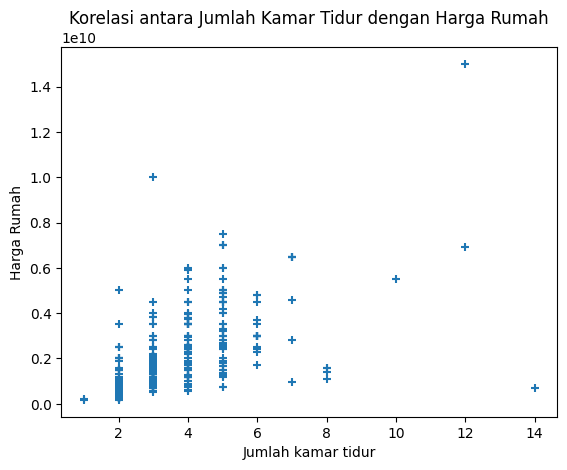

In [28]:
plt.scatter(df4.kamar_tidur, df4.harga, marker='+')
plt.title('Korelasi antara Jumlah Kamar Tidur dengan Harga Rumah')
plt.xlabel('Jumlah kamar tidur')
plt.ylabel('Harga Rumah')
plt.show()

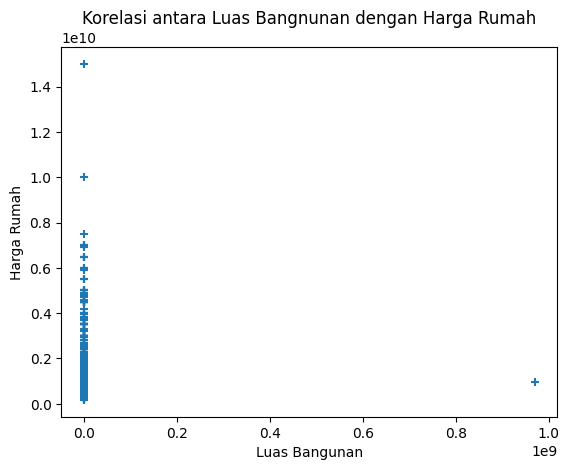

In [29]:
plt.scatter(df4.luas_bangunan, df4.harga, marker='+')
plt.title('Korelasi antara Luas Bangnunan dengan Harga Rumah')
plt.xlabel('Luas Bangunan')
plt.ylabel('Harga Rumah')
plt.show()

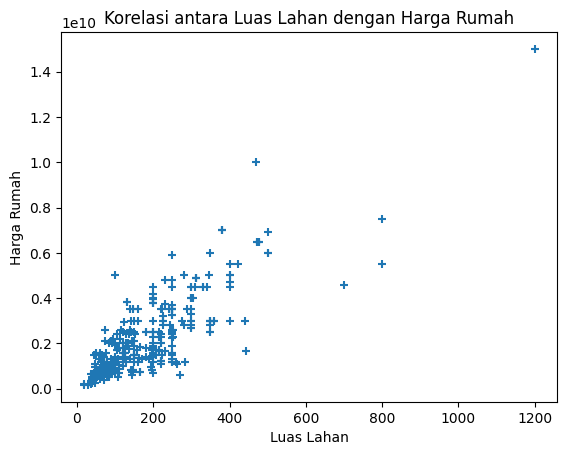

In [30]:
plt.scatter(df4.luas_lahan, df4.harga, marker='+')
plt.title('Korelasi antara Luas Lahan dengan Harga Rumah')
plt.xlabel('Luas Lahan')
plt.ylabel('Harga Rumah')
plt.show()

Outlier detected, lets do some data cleaning again.

# Data Cleaning, Again

In [31]:
df4.describe()

,index,kamar_tidur,luas_bangunan,luas_lahan,harga,Balikpapan Barat,Balikpapan Kota,Balikpapan Selatan,Balikpapan Tengah,Balikpapan Timur,Balikpapan Utara
count,338.000000,338.000000,3.380000e+02,338.000000,3.380000e+02,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000
mean,240.884615,3.647929,2.870046e+06,176.985207,2.133442e+09,0.002959,0.097633,0.576923,0.014793,0.068047,0.239645
std,125.095269,1.660417,5.276103e+07,134.927466,1.755728e+09,0.054393,0.297258,0.494780,0.120902,0.252200,0.427500
min,4.000000,1.000000,6.000000e+01,18.000000,1.700000e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,140.250000,2.000000,1.200000e+02,76.250000,8.500000e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,244.500000,3.000000,1.800000e+02,145.500000,1.600000e+09,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,348.750000,4.750000,3.000000e+02,250.000000,3.000000e+09,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,448.000000,14.000000,9.700000e+08,1200.000000,1.500000e+10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
df5 = df4[df4.harga != 	1.500000e+10]
df5.describe()

,index,kamar_tidur,luas_bangunan,luas_lahan,harga,Balikpapan Barat,Balikpapan Kota,Balikpapan Selatan,Balikpapan Tengah,Balikpapan Timur,Balikpapan Utara
count,337.000000,337.000000,3.370000e+02,337.000000,3.370000e+02,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000
mean,241.065282,3.623145,2.878560e+06,173.949555,2.095263e+09,0.002967,0.097923,0.578635,0.014837,0.065282,0.240356
std,125.237115,1.599051,5.283925e+07,123.026833,1.611704e+09,0.054473,0.297652,0.494512,0.121079,0.247390,0.427935
min,4.000000,1.000000,6.000000e+01,18.000000,1.700000e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,140.000000,2.000000,1.200000e+02,75.000000,8.500000e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,245.000000,3.000000,1.800000e+02,145.000000,1.600000e+09,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,349.000000,4.000000,3.000000e+02,250.000000,3.000000e+09,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,448.000000,14.000000,9.700000e+08,800.000000,1.000000e+10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
df5 = df5[df5.harga != 1.000000e+10]

In [34]:
df5 = df5[df5.luas_bangunan != 9.700000e+08]

# Data Visualization, Again

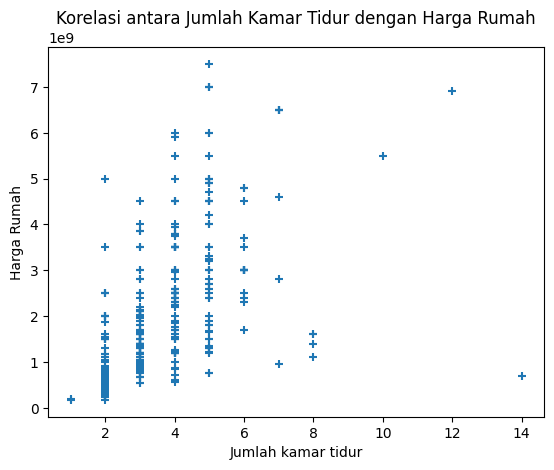

In [35]:
plt.scatter(df5.kamar_tidur, df5.harga, marker='+')
plt.title('Korelasi antara Jumlah Kamar Tidur dengan Harga Rumah')
plt.xlabel('Jumlah kamar tidur')
plt.ylabel('Harga Rumah')
plt.show()

lets remove the house that has >8 bedroom and <2 bedroom

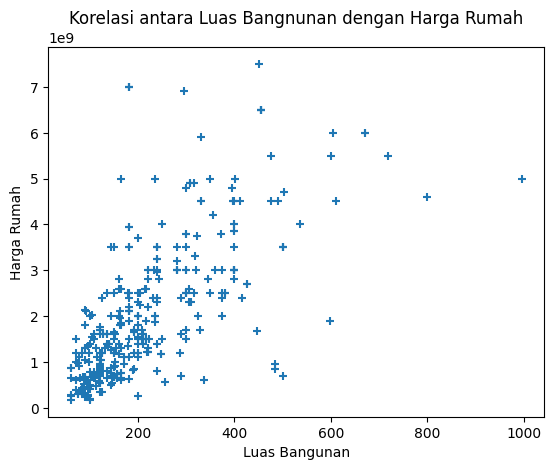

In [36]:
plt.scatter(df5.luas_bangunan, df5.harga, marker='+')
plt.title('Korelasi antara Luas Bangnunan dengan Harga Rumah')
plt.xlabel('Luas Bangunan')
plt.ylabel('Harga Rumah')
plt.show()

there is 1 outlier, lets remove it

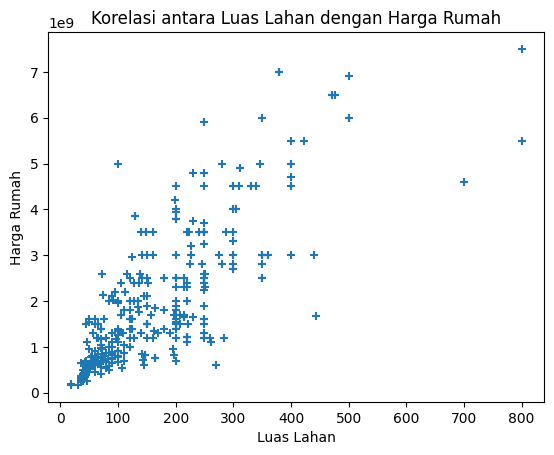

In [37]:
plt.scatter(df5.luas_lahan, df5.harga, marker='+')
plt.title('Korelasi antara Luas Lahan dengan Harga Rumah')
plt.xlabel('Luas Lahan')
plt.ylabel('Harga Rumah')
plt.show()

there are 3 outliers, lets remove them

# Data Cleaning Again

In [38]:
df5.describe()

,index,kamar_tidur,luas_bangunan,luas_lahan,harga,Balikpapan Barat,Balikpapan Kota,Balikpapan Selatan,Balikpapan Tengah,Balikpapan Timur,Balikpapan Utara
count,335.000000,335.000000,335.000000,335.000000,3.350000e+02,335.000000,335.000000,335.000000,335.00000,335.000000,335.000000
mean,241.367164,3.629851,221.137313,173.444776,2.075025e+09,0.002985,0.098507,0.582090,0.01194,0.065672,0.238806
std,124.779468,1.600993,137.400608,122.128267,1.556234e+09,0.054636,0.298445,0.493953,0.10878,0.248078,0.426992
min,4.000000,1.000000,60.000000,18.000000,1.700000e+08,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,140.500000,2.000000,120.000000,77.500000,8.400000e+08,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,245.000000,3.000000,180.000000,145.000000,1.600000e+09,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
75%,348.500000,4.500000,297.000000,250.000000,2.975000e+09,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
max,448.000000,14.000000,996.000000,800.000000,7.500000e+09,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [39]:
df6 = df5[df5.kamar_tidur <= 8]
df6 = df6[df6.kamar_tidur >=2]
df6.describe()

,index,kamar_tidur,luas_bangunan,luas_lahan,harga,Balikpapan Barat,Balikpapan Kota,Balikpapan Selatan,Balikpapan Tengah,Balikpapan Timur,Balikpapan Utara
count,330.000000,330.000000,330.000000,330.000000,3.300000e+02,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,241.787879,3.569697,219.936364,171.418182,2.065647e+09,0.003030,0.096970,0.584848,0.012121,0.060606,0.242424
std,123.733771,1.375974,135.246523,116.066723,1.524697e+09,0.055048,0.296366,0.493496,0.109593,0.238969,0.429200
min,4.000000,2.000000,60.000000,30.000000,1.770000e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,142.250000,2.000000,120.000000,80.000000,8.525000e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,245.500000,3.000000,180.000000,145.000000,1.600000e+09,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,347.750000,4.000000,296.750000,248.750000,2.912500e+09,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,448.000000,8.000000,996.000000,800.000000,7.500000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
df6 = df6[df6.luas_bangunan != 996.000000]
df6.describe()

,index,kamar_tidur,luas_bangunan,luas_lahan,harga,Balikpapan Barat,Balikpapan Kota,Balikpapan Selatan,Balikpapan Tengah,Balikpapan Timur,Balikpapan Utara
count,329.000000,329.000000,329.000000,329.000000,3.290000e+02,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,241.917933,3.565350,217.577508,170.723404,2.056728e+09,0.003040,0.097264,0.583587,0.012158,0.060790,0.243161
std,123.899654,1.375798,128.474139,115.554203,1.518373e+09,0.055132,0.296769,0.493715,0.109758,0.239309,0.429645
min,4.000000,2.000000,60.000000,30.000000,1.770000e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,142.000000,2.000000,120.000000,80.000000,8.500000e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,246.000000,3.000000,180.000000,145.000000,1.600000e+09,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,348.000000,4.000000,290.000000,245.000000,2.800000e+09,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,448.000000,8.000000,800.000000,800.000000,7.500000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
df6 = df6[df6.luas_lahan != 800.000000]
df6.describe()

,index,kamar_tidur,luas_bangunan,luas_lahan,harga,Balikpapan Barat,Balikpapan Kota,Balikpapan Selatan,Balikpapan Tengah,Balikpapan Timur,Balikpapan Utara
count,328.000000,328.000000,328.000000,328.000000,3.280000e+02,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,241.329268,3.560976,216.868902,168.804878,2.040133e+09,0.003049,0.097561,0.582317,0.012195,0.060976,0.243902
std,123.627319,1.375607,128.024909,110.358237,1.490511e+09,0.055216,0.297173,0.493931,0.109924,0.239651,0.430091
min,4.000000,2.000000,60.000000,30.000000,1.770000e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,141.750000,2.000000,120.000000,78.750000,8.500000e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,245.500000,3.000000,180.000000,144.500000,1.600000e+09,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,347.250000,4.000000,290.000000,241.250000,2.800000e+09,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,448.000000,8.000000,800.000000,700.000000,7.000000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
df6 = df6[df6.luas_lahan != 700.000000]
df6.describe()

,index,kamar_tidur,luas_bangunan,luas_lahan,harga,Balikpapan Barat,Balikpapan Kota,Balikpapan Selatan,Balikpapan Tengah,Balikpapan Timur,Balikpapan Utara
count,327.000000,327.000000,327.000000,327.000000,3.270000e+02,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000
mean,242.018349,3.550459,215.085627,167.180428,2.032304e+09,0.003058,0.097859,0.584098,0.009174,0.061162,0.244648
std,123.184309,1.364445,124.074137,106.527487,1.486027e+09,0.055300,0.297580,0.493632,0.095488,0.239995,0.430537
min,4.000000,2.000000,60.000000,30.000000,1.770000e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,142.500000,2.000000,120.000000,77.500000,8.500000e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,246.000000,3.000000,180.000000,144.000000,1.600000e+09,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,347.500000,4.000000,288.500000,235.000000,2.800000e+09,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,448.000000,8.000000,670.000000,500.000000,7.000000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Visualization Again

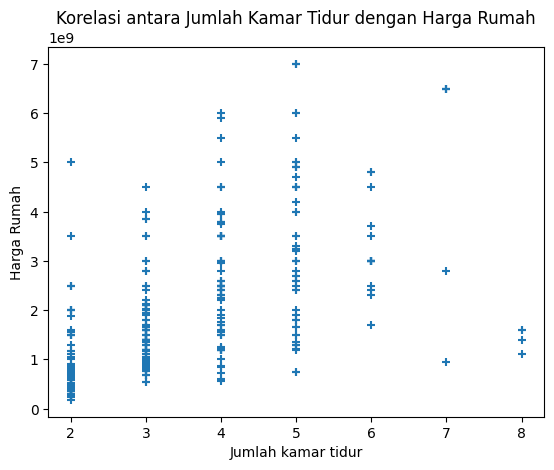

In [43]:
plt.scatter(df6.kamar_tidur, df6.harga, marker='+')
plt.title('Korelasi antara Jumlah Kamar Tidur dengan Harga Rumah')
plt.xlabel('Jumlah kamar tidur')
plt.ylabel('Harga Rumah')
plt.show()

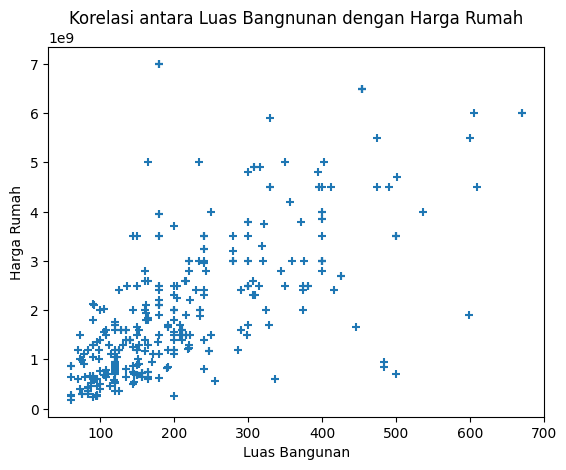

In [44]:
plt.scatter(df6.luas_bangunan, df6.harga, marker='+')
plt.title('Korelasi antara Luas Bangnunan dengan Harga Rumah')
plt.xlabel('Luas Bangunan')
plt.ylabel('Harga Rumah')
plt.show()

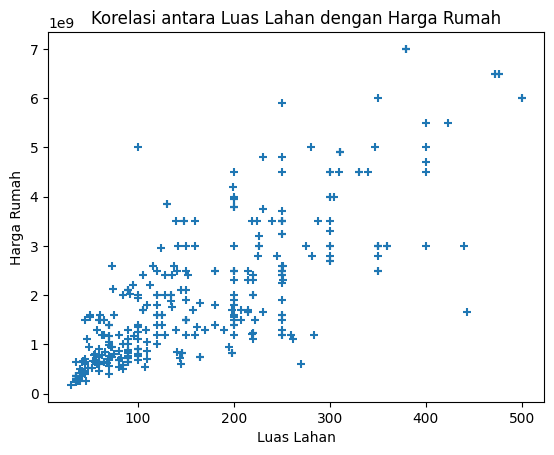

In [45]:
plt.scatter(df6.luas_lahan, df6.harga, marker='+')
plt.title('Korelasi antara Luas Lahan dengan Harga Rumah')
plt.xlabel('Luas Lahan')
plt.ylabel('Harga Rumah')
plt.show()

I think the data is pretty clean now, lets do a ML model training now

In [47]:
df6.head()

,index,kamar_tidur,luas_bangunan,luas_lahan,harga,Balikpapan Barat,Balikpapan Kota,Balikpapan Selatan,Balikpapan Tengah,Balikpapan Timur,Balikpapan Utara
0,4,4,306,251,2300000000,0,0,1,0,0,0
1,5,4,120,136,1750000000,0,0,1,0,0,0
2,6,2,157,65,650000000,0,0,0,0,1,0
3,7,3,78,100,900000000,0,0,0,0,0,1
4,8,3,120,90,760000000,0,0,0,0,0,1


In [49]:
df6['Balikpapan Tengah'].value_counts()

Balikpapan Tengah
0    324
1      3
Name: count, dtype: int64

In [46]:
df6.to_csv('harga_rumah.csv')